In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
import operator
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import GridSearchCV
import pandas as pd
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics

In [10]:
wine = pd.read_csv("/Users/yangxiaonan/Downloads/winequality-red.csv")
wine =wine.drop(["chlorides"],axis=1)
wine =wine.drop(["pH"],axis=1)
wine =wine.drop(["density"],axis=1)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   free sulfur dioxide   1599 non-null   float64
 5   total sulfur dioxide  1599 non-null   float64
 6   sulphates             1599 non-null   float64
 7   alcohol               1599 non-null   float64
 8   quality               1599 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 112.6 KB


In [11]:
X = wine.iloc[:,:8]
Y = wine.iloc[:,8]

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=500)

In [13]:
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_smote, Y_smote = resample.fit_resample(X, Y)

In [14]:
X_smote_train, X_smote_test, Y_smote_train, Y_smote_test = train_test_split(X_smote, Y_smote, test_size=0.3, random_state=5)

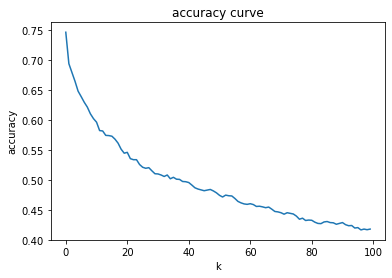

The best K is: {'n_neighbors': 1}
The highest accuracy is: 0.7469330529267438


In [15]:
knn = neighbors.KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 101)}
knn_gscv = GridSearchCV(knn, param_grid, cv=3)
knn_gscv.fit(X_smote_train, Y_smote_train)
knn_gscv.best_params_
score = knn_gscv.cv_results_['mean_test_score']
K = np.arange(100)
plt.title('accuracy curve')
plt.plot(K,score , "-")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

print("The best K is:",knn_gscv.best_params_)
print("The highest accuracy is:",knn_gscv.best_score_)

In [16]:
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X_smote_train, Y_smote_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8875
